In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [71]:
data=pd.read_csv("Datasets/data.csv",header=None,names=["Population","Profit"])
#print(data.head(10))
#print(data.describe())
#print(data.info())

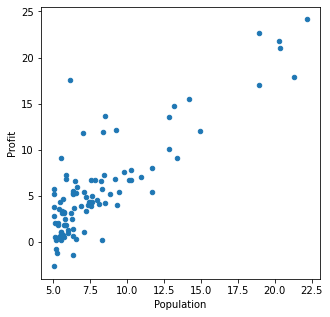

In [72]:
data.plot(kind='scatter',x='Population',y='Profit',figsize=(5,5))
#plt.scatter(x=data.Population,y=data.Profit)
#plt.show()
data.insert(0,'Ones',1)#f column 0  ghadi n3tih smaya two w 

In [73]:

cols=data.shape[1]
rows=data.shape[0]
x=data.iloc[:,0:cols-1]
#data.drop('two',axis=1,inplace=True)
#data.drop('Ones',axis=1,inplace=True)
y=data.iloc[:,cols-1:cols]
x=np.matrix(x.values)
y=np.matrix(y.values)
theta=np.matrix(np.array([0,0]))
print(theta.ravel().shape[0])
# chno kadir ravel: ravel katwahad lina star ya3ni katchof chhal man elament
# f star kayan n9adro nkono zgalna wahad ra9m man ba9d 3ad kamalna
# ravel r´katchof f total chhal man nombre kayaw n rows dyal marix
#shape[1]# 3adad columns
#shape[0]# nombre dyal rows








1


In [74]:
def costFunction(x,y,theta):#voir vorlessung in oneNote
    z=np.power(((x*theta.T)-y),2)#x*theta.T=h(x)-y voir vorlessung
    return  np.sum(z)/(2*len(x))
#print('costFunction',costFunction(x,y,theta))
cost =costFunction(x,y,theta)
print(cost)
print(x)
print(x[:,0])




31.656824855345835
[[ 1.      6.1101]
 [ 1.      5.5277]
 [ 1.      8.5186]
 [ 1.      7.0032]
 [ 1.      5.8598]
 [ 1.      8.3829]
 [ 1.      7.4764]
 [ 1.      6.4862]
 [ 1.      5.0546]
 [ 1.      5.7107]
 [ 1.     14.164 ]
 [ 1.      5.734 ]
 [ 1.      8.4084]
 [ 1.      5.6407]
 [ 1.      5.3794]
 [ 1.      6.3654]
 [ 1.      5.1301]
 [ 1.      6.4296]
 [ 1.      7.0708]
 [ 1.      6.1891]
 [ 1.     20.27  ]
 [ 1.      5.4901]
 [ 1.      6.3261]
 [ 1.      5.5649]
 [ 1.     18.945 ]
 [ 1.     12.828 ]
 [ 1.     10.957 ]
 [ 1.     13.176 ]
 [ 1.     22.203 ]
 [ 1.      5.2524]
 [ 1.      6.5894]
 [ 1.      9.2482]
 [ 1.      5.8918]
 [ 1.      8.2111]
 [ 1.      7.9334]
 [ 1.      8.0959]
 [ 1.      5.6063]
 [ 1.     12.836 ]
 [ 1.      6.3534]
 [ 1.      5.4069]
 [ 1.      6.8825]
 [ 1.     11.708 ]
 [ 1.      5.7737]
 [ 1.      7.8247]
 [ 1.      7.0931]
 [ 1.      5.0702]
 [ 1.      5.8014]
 [ 1.     11.7   ]
 [ 1.      5.5416]
 [ 1.      7.5402]
 [ 1.      5.3077]
 [ 1.      7

In [76]:
#parameters: theta hy matrix 1*2 

def GradientDescent(x,y,theta,alpha,iters):
    temp=np.matrix(np.zeros(theta.shape))# hit ana f asl kan9alab 3la theta0 et theta1 donc darna matrix fih 1*2
    parameters=int(theta.ravel().shape[1])# matrice :1*2===>2
    cost=np.zeros(iters)
    for i in range(iters):
        error=(x*theta.T)-y
        for j in range(parameters):
            term =np.multiply(error,x[:,j])
            temp[0,j]=theta[0,j]-((alpha/len(x))*np.sum(term))
            theta=temp
            cost[i]=costFunction(x,y,theta)
    return theta,cost
alpha=0.01
iters=100
theta,cost =GradientDescent(x,y,theta,alpha,iters)
print(theta)
print(cost[0:50])

    
    

[[-0.53900918  0.85010152]]
[29.99214641  6.62972128  5.8927351   5.86432331  5.85812114  5.85263381
  5.84718812  5.8417629   5.83635743  5.83097161  5.82560537  5.82025863
  5.81493134  5.80962341  5.80433478  5.79906538  5.79381513  5.78858397
  5.78337183  5.77817863  5.77300432  5.76784881  5.76271205  5.75759397
  5.75249449  5.74741354  5.74235108  5.73730701  5.73228128  5.72727383
  5.72228457  5.71731346  5.71236042  5.70742538  5.70250829  5.69760907
  5.69272766  5.687864    5.68301802  5.67818966  5.67337885  5.66858553
  5.66380964  5.65905111  5.65430988  5.64958588  5.64487906  5.64018935
  5.63551669  5.63086102]


In [65]:
#bestfitline
x=np.linspace(data.Population.min(),data.Population.max(),100)
f=theta[0,0]+(theta[0,1]*x)


Text(0.5, 1.0, 'prediction profit vs Population size')

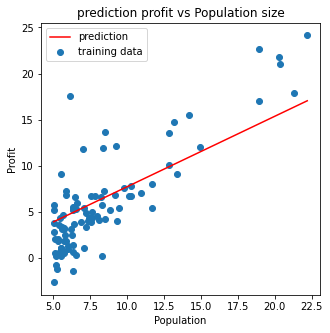

In [66]:
fig,ax=plt.subplots(figsize=(5,5))
ax.plot(x,f,'r',label='prediction')
ax.scatter(data.Population,data.Profit,label='training data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('prediction profit vs Population size')



Text(0.5, 1.0, ' error vs training epoch')

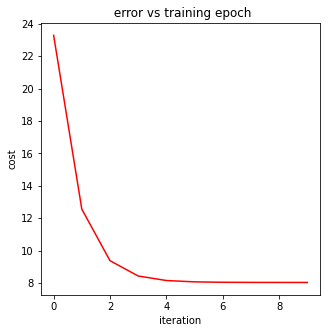

In [34]:
fig, ax=plt.subplots(figsize=(5,5))
ax.plot(np.arange(iters),cost,'r')
ax.set_xlabel('iteration')
ax.set_ylabel('cost')
ax.set_title(' error vs training epoch')


In [ ]:
#when do we use data scaling : we ist after doing data.describe() if we find that mean of each features are widly diiferent we do it
# that's mean we create interval for our feature [0,1]or [-1,1] to avoid aoverfitting<<<< compare apple with apple
#https://www.youtube.com/watch?v=1K6ulsf1DRs

